In [ ]:
from azureml.core import Workspace, Dataset, Datastore
import pandas as pd

ws = Workspace.get(
    name="Sjlee-ml-001",
    resource_group="lsj-RG",
    subscription_id="dc6618c1-53d2-4bc8-ab82-68140c3fbde1"
)

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 7, Finished, Available, Finished)

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code ISGL2FN6Z to authenticate.
Interactive authentication successfully completed.


In [18]:
# 2. 등록된 데이터셋 불러오기
dataset = Dataset.get_by_name(ws, name='sbscr_data_ml_02')
df = dataset.to_pandas_dataframe()
df_rsc = dataset.to_pandas_dataframe()

df.head()

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 23, Finished, Available, Finished)

,년월,고객ID,성별,연령대,가입일,해지일,요금제,단말기기종,상태,상태사유,신용등급,선택약정여부,요금제가격,월평균요금,데이터사용량(GB),가입자수
0,202503,CUST0001,F,30대,2022-08-10,0000-00-00,TVING 초이스 스페셜,Galaxy S22,정상,사용중,1등급,False,110000,85661,28.3,1
1,202504,CUST0002,F,10대,2021-09-08,0000-00-00,디즈니+ 초이스 스페셜,Galaxy S22,정상,사용중,2등급,True,110000,79712,31.0,1
2,202503,CUST0003,M,20대,2022-11-25,2024-08-09,왓챠 초이스 스페셜,iPhone 14,해지,단순 해지 요청,1등급,False,110000,82473,39.7,0
3,202503,CUST0004,M,50대,2021-12-08,2022-08-28,지니 초이스 프리미엄,Galaxy S22,해지,요금 불만,4등급,True,130000,85470,47.8,0
4,202503,CUST0005,M,60대 이상,2023-09-19,0000-00-00,지니 초이스 베이직,Galaxy S22,일시정지,일시적인 요금 부담,4등급,True,90000,65176,23.3,1


In [5]:
# 3. 전처리
import pandas as pd

# 날짜/식별자 제거 (필요에 따라 조정 가능)
df = df.drop(columns=['고객ID', '년월', '가입일', '해지일'])

# 결측값 제거
df = df.dropna()

# 범주형 변수 → 원-핫 인코딩
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. 입력 변수(X), 타겟 변수(y) 분리
X = df_encoded.drop('가입자수', axis=1)
y = df_encoded['가입자수']

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 10, Finished, Available, Finished)

In [6]:
X.head()

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 11, Finished, Available, Finished)

,선택약정여부,요금제가격,월평균요금,데이터사용량(GB),성별_M,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대 이상,...,상태사유_서비스 품질 문제,상태사유_요금 불만,상태사유_일시적인 요금 부담,상태사유_장기 미사용,상태사유_타사로 이동,상태사유_해외 장기 출장,신용등급_2등급,신용등급_3등급,신용등급_4등급,신용등급_5등급
0,False,110000,85661,28.3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,True,110000,79712,31.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,False,110000,82473,39.7,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,True,130000,85470,47.8,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,True,90000,65176,23.3,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [8]:
y.head()

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 13, Finished, Available, Finished)

0    1
1    1
2    0
3    0
4    1
Name: 가입자수, dtype: int64

In [9]:
# 5. 학습/테스트 세트 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. 모델 학습
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 14, Finished, Available, Finished)

RandomForestClassifier(random_state=42)

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 15, Finished, Available, Finished)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        61

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/tmp/ipykernel_12312/3231909860.py:18: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/3231909860.py:18: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/3231909860.py:18: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/3231909860.py:18: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/3231909860.py:18: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/3231909860.py:18: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/3231909860.py:18: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/3231909860.py:

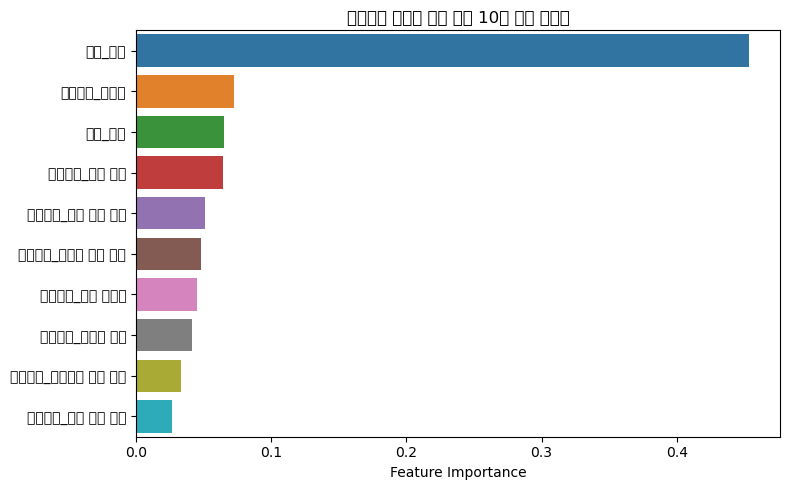

In [10]:
# 7. 예측 및 평가
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 18, Finished, Available, Finished)

/tmp/ipykernel_12312/2992658898.py:15: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/2992658898.py:15: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/2992658898.py:15: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/2992658898.py:15: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/2992658898.py:15: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/2992658898.py:15: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/2992658898.py:15: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_12312/2992658898.py:

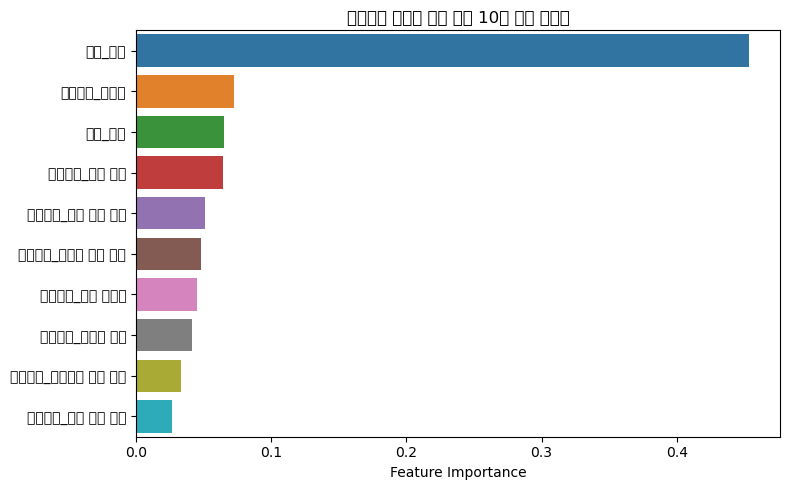

In [13]:
# 8. 변수 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

# plt.figure(figsize=(8, 5))
# sns.barplot(x=top_features.values, y=top_features.index)
# plt.title("가입자수 예측을 위한 상위 10개 변수 중요도")
# plt.xlabel("Feature Importance")
# plt.tight_layout()
# plt.show()

In [17]:
top_features.index

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 22, Finished, Available, Finished)

Index(['상태_해지', '상태사유_사용중', '상태_정상', '상태사유_요금 불만', '상태사유_단순 해지 요청',
       '상태사유_서비스 품질 문제', '상태사유_장기 미사용', '상태사유_타사로 이동', '상태사유_일시적인 요금 부담',
       '상태사유_해외 장기 출장'],
      dtype='object')

In [ ]:
import pandas as pd
from azure.storage.blob import BlobServiceClient
from io import StringIO

# ✅ 1. 예측 결과를 새 열로 붙인 새 DataFrame 생성 (원본 df는 수정하지 않음)
df_with_prediction = pd.concat([df_rsc, pd.Series(y_pred, name='M+1')], axis=1)

# ✅ 2. DataFrame → 메모리 내 CSV (파일 저장 없이)
csv_buffer = StringIO()
df_with_prediction.to_csv(csv_buffer, index=False, encoding='UTF-8')
csv_buffer.seek(0)

# ✅ 3. Azure Blob Storage 연결 설정
connection_string = "DefaultEndpointsProtocol=https;AccountName=sjleestoragemvp001;AccountKey=nYqt847X6cUYlaQeyquDVuTboKvQ1yk02/XvFSubnZTBNZy2JCQBE78ndulxDm6260ckdfFURAEg+AStTnjDLA==;EndpointSuffix=core.windows.net"
container_name = "data"
blob_path = "/ml/predicted_sbscr_with_m_plus_1.csv"

# ✅ 4. Blob 업로드
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_path)

# ✅ 5. 업로드 실행 (메모리 버퍼 이용, 로컬 저장 없음)
blob_client.upload_blob(csv_buffer.getvalue(), overwrite=True)

print(f"✅ 예측 결과가 Blob Storage에 직접 저장되었습니다: {blob_path}")

StatementMeta(5f59bc06-b850-41e5-9556-b74696325aeb, 2, 25, Finished, Available, Finished)

✅ 예측 결과가 Blob Storage에 직접 저장되었습니다: predicted_subscribers_with_m_plus_1.csv
